<a href="https://colab.research.google.com/github/dhavalsimaria/MachineLearning/blob/master/Anomaly%20Detection/Anomaly_Detection_OC_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager
from scipy import stats
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve
import pickle

In [2]:
from google.colab import files
import io

In [70]:
uploaded = files.upload()

Saving data-test-refined.xlsx to data-test-refined.xlsx


In [5]:
train_df = pd.read_excel(io.BytesIO(uploaded["data-train-refined.xlsx"]))

In [71]:
test_df = pd.read_excel(io.BytesIO(uploaded["data-test-refined.xlsx"]))

In [74]:
X_train = train_df.filter(['dbtiban', 'instdamt', 'amtccy', 'cdtrnm'], axis=1)

In [72]:
X_test = test_df.filter(['dbtiban', 'instdamt', 'amtccy', 'cdtrnm'], axis=1)
y_test = test_df.filter(['isAnomaly'], axis=1)

In [83]:
X_test.head()

,dbtiban,instdamt,amtccy,cdtrnm
0,1,1,0,0
1,1,422,0,0
2,1,347,0,0
3,1,792,0,0
4,1,200000,3,1


In [75]:
le = LabelEncoder()
X_train['dbtiban'] = le.fit_transform(X_train['dbtiban'])
X_train['amtccy'] = le.fit_transform(X_train['amtccy'])
X_train['cdtrnm'] = le.fit_transform(X_train['cdtrnm'])

In [15]:
with open("label_encoder.pickle", 'wb') as handle:
        pickle.dump(le, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [73]:
X_test['dbtiban'] = le.fit_transform(X_test['dbtiban'])
X_test['amtccy'] = le.fit_transform(X_test['amtccy'])
X_test['cdtrnm'] = le.fit_transform(X_test['cdtrnm'])

In [64]:
#Scale entire dataset using StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)

In [65]:
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)

In [54]:
# DOES NOT HELP
# Scale 'instdamt' column using StandardScalar for train dataset
'''
col_name = ['instdamt']
features = X_train[col_name]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_train[col_name] = features
'''

In [55]:
# DOES NOT HELP
# Scale 'instdamt' column using StandardScalar for test dataset
'''
features = X_test[col_name]
features = scaler.transform(features.values)
X_test[col_name] = features
'''

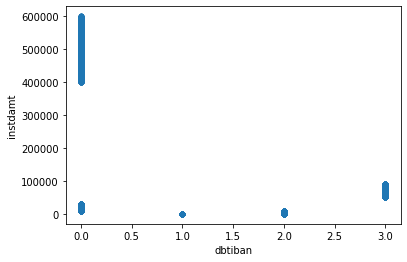

In [82]:
X_train.plot.scatter('dbtiban', 'instdamt')

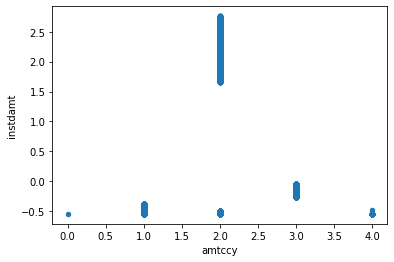

In [ ]:
X_train.plot.scatter('amtccy', 'instdamt')

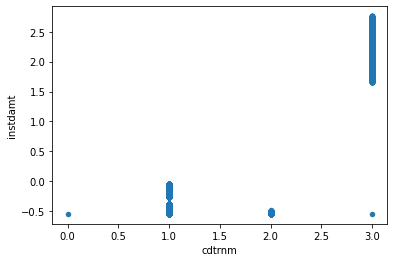

In [ ]:
$errala1234X_train.plot.scatter('cdtrnm', 'instdamt')

In [76]:
#svm = OneClassSVM(kernel='rbf', nu=0.02, gamma=0.000001)
classifier = OneClassSVM(kernel='rbf', nu=0.02, gamma=0.000001).fit(X_train)

In [81]:
with open("ocsvm_anomalty_detector.pickle", 'wb') as handle:
        pickle.dump(classifier, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
'''
X_test = test_df[['DBTIBAN', 'CDTRNM', 'AMTCCY', 'INSTDAMT']]
X_test.head(5)
X_test.tail(5)
y_test = test_df['isAnomaly']
'''

In [77]:
y_pred = classifier.predict(X_test)

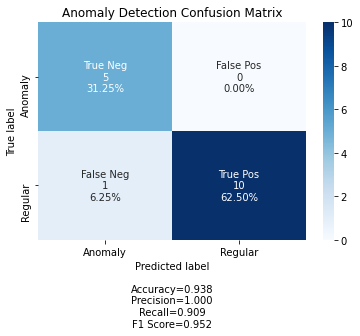

In [78]:
title = 'Anomaly Detection Confusion Matrix'
cm = confusion_matrix(y_test, y_pred)
#print(cm)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Anomaly', 'Regular']
make_confusion_matrix(cm, group_names=labels, categories=categories, cmap='Blues', title=title)

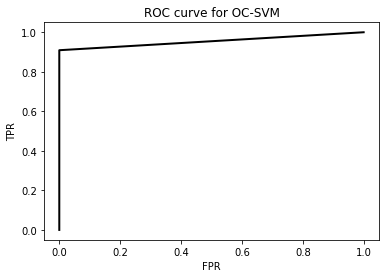

In [79]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr, tpr, 'k-', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
title = 'ROC curve for OC-SVM' 
plt.title(title)
plt.savefig(title + ".jpg")
plt.show()

In [20]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)